### A Crash Course on Quantum Simulation & Computation

#### Week 4. Response Functions: Impedance measurement

The electric circuit to simulate the desired Hamiltonians can simulate the topological phases of the matter. How can one verify it? Doing a measurement,
- voltage distribution on each node, $V(i) = \langle i | V \rangle$. To compare the "wave function" with theory.
- impedance measurement could reflect the topological vs trivial phase

Our focus is give to the impedance measurement. In theory, it is called the response function in general. It can be defined between two arbitrary modes in a system, $Z_{ij}$.

##### Formal explanation:
Note: Throughout the calculation, we use two basis vectors:
- local basis $\{ | i \rangle \}$: real space local voltage "pieces" which are orthonormal, i.e. $\langle i | j \rangle = \delta_{ij}$.
- eigenbasis for J, $\{ | \phi_m \rangle \}$ where $J | \phi_m \rangle = \lambda_m |\phi_m \rangle$. $| \phi_m \rangle$ are real space extended voltage functions represented as vectors for each side. The basis vector are orthonormal, i.e. $\langle \phi_m | \phi_n \rangle = \delta_{nm}$.

Response function can indeed be calculated by using the Green's function of the corresponding operator, in our case the 'operator' is the Laplacian matrix, $J$ and the response function is the impedance, $Z_{ij}$ between two nodes, say $(i)$ and $(j)$.

In the eigenbasis where , using the identity operator $\mathbb{1} = \sum_m |\phi_m \rangle \langle \phi_m |$, the Laplacian matrix $J$ can be expanded as follows:

$$J =J  \mathbb{1} = \sum_m J |\phi_m \rangle \langle \phi_m | = \sum_m \lambda_m |\phi_m \rangle \langle \phi_m |$$

It is called the "expansion in the diagonal basis". In this basis, $J$ literally has a diagonal matrix structure, i.e. arithmatic operations can be carried our as in scalars. In such a basis, it is easy to calculate the Green's function, $G(z) = (z - J)^{-1}$. the variable $z$ is the 'concern' of the complex analysis and causality, so simply ignore that. G(z) can easily be written as "1 divided by the eigenvalues for each element",
$$G(z) = \sum_m \frac{1}{z-\lambda_m} |\phi_m \rangle \langle \phi_m |$$

Multiplyin both sides of $J | V \rangle = | I \rangle $ with $J^{-1}$, we obtain the following relation 

$$| V \rangle = J^{-1} | I \rangle = G(0)| I \rangle$$

Therefore, we obtain the voltage distribution. Let us first expand both sides with $\mathbb{1} = \sum_m |\phi_m \rangle \langle \phi_m |$,

$$\sum_m V_m |\phi_m \rangle = \sum_m \frac{1}{\lambda_m} |\phi_m \rangle \langle \phi_m | I \rangle$$

- How do we calculate the impedance? We further connect a current source between node $(i)$ and $(j)$. What is $Z_{ij}$ seen through the port (i-j)? Ans: 

$$Z_{ij} = \frac{V(i) - V(j)}{I}$$

because the current is the same! Now, we will replace $V_i$ and $V_j$ and obtain a handy expression.

In the local basis, the current vector $\mathbb{1} | I \rangle = \sum_k I(k) |k\rangle$ elements $I_k$ is known thanks to our assumption. $I_k$ is non zero when $k=i$ and $k=j$ but with opposite signs,

$$I(k) = I (\delta_{ki}-\delta_{kj}).$$

Similarly for the voltage vector $| V \rangle $ in the local basis $\mathbb{1} = \sum_k |k \rangle \langle k|$,

\begin{eqnarray}
\mathbb{1}| V \rangle &=& G| I \rangle = \mathbb{1} G \mathbb{1} | I \rangle,\\
\sum_k V(k) | k \rangle &=& \sum_{kp} |k \rangle \langle k| G |p \rangle \langle p  | I \rangle,\\
\sum_k \Big( V(k) &-& \sum_{p} G(k,p) I(p) \Big)| k \rangle = 0 
\end{eqnarray}

Matching the coefficients, we find $V(k)$ as

$$V(k) = \sum_{p} G(k,p) I(p), \quad \text{and} \quad G(k,p) = \sum_m \frac{\phi_m(p)^* \phi_m(k)}{\lambda_m}.$$

- Using the result in the previous line along with $I(p) = I (\delta_{pi}-\delta_{pj})$ for $Z_{ij} = \frac{V(i) - V(j)}{I}$,

$$Z_{ij} = \sum_{p} \big[ G(i,p)- G(j,p) \big](\delta_{pi}-\delta_{pj}) = G(i,i) -G(i,j)-G(j,i)+G(j,j). $$

#### Easier route:

It turned out that the impedance $Z_{ij}$ is a linear combination of the matrix elements $G(i,j)$ of $G = J^{-1}$ in the local basis!

Let us consider an SSH model in electric circuits! The Laplacian for the infinite system is,
<center><img src="week4_Fig1.JPG" width="520"></center>

In [1]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pylab import * # for plotting commands
import matplotlib.pyplot as plt
from IPython.display import Image
from mpl_toolkits.mplot3d import axes3d

A finite chain however takes the following form

<center><img src="week4_Fig2.jpg" width="820"></center>

In [2]:
C2 = 1.  # in units of Farads
C1 = 0.2 # in units of Farads
L = 1.   # in units of Henry

NumSites = 3

t = C1/C2                      # kapasitansların oranı
omega_0 = (L*(C1+C2))**(-0.5)  # rezonans frekansı
omega = omega_0                # rezonansta seçilmiş olan frekans

In [3]:
Energy = np.zeros((2*NumSites,1),dtype='float');  
Psi = np.zeros((2*NumSites,2*NumSites),dtype='complex');  

E0 = (1+t)*(1-(omega_0/omega)**2)

In [131]:
H1 = E0*diag(ones(NumSites*2,),0) -t*(diag(mod(arange(0,2*NumSites-1)+1,2),1)+diag(mod(arange(0,2*NumSites-1)+1,2),-1))\
-(diag(mod(arange(0,2*NumSites-1),2),1)+diag(mod(arange(0,2*NumSites-1),2),-1))

In [132]:
t2 = C2/C1
H2 = E0*diag(2*mod(arange(0,2*NumSites)+1.,2)-1)\
-t2*(diag(mod(arange(0,2*NumSites-1)+1,2),1)+diag(mod(arange(0,2*NumSites-1)+1,2),-1))\
-(diag(mod(arange(0,2*NumSites-1),2),1)+diag(mod(arange(0,2*NumSites-1),2),-1))

In [133]:
print(H1)
print(H2)

[[ 0.  -0.2  0.   0.   0.   0. ]
 [-0.2  0.  -1.   0.   0.   0. ]
 [ 0.  -1.   0.  -0.2  0.   0. ]
 [ 0.   0.  -0.2  0.  -1.   0. ]
 [ 0.   0.   0.  -1.   0.  -0.2]
 [ 0.   0.   0.   0.  -0.2  0. ]]
[[ 0. -5.  0.  0.  0.  0.]
 [-5. -0. -1.  0.  0.  0.]
 [ 0. -1.  0. -5.  0.  0.]
 [ 0.  0. -5. -0. -1.  0.]
 [ 0.  0.  0. -1.  0. -5.]
 [ 0.  0.  0.  0. -5. -0.]]


In [134]:
[En,Psin] = eig(H1)
Eorder   = argsort(En.real)
E1 = En[Eorder]
Psi = Psin[:,Eorder]
Energy = E1

[En2,Psin2] = eig(H2)
Eorder2   = argsort(En2.real)
E2 = En2[Eorder2]
Psi2 = Psin2[:,Eorder2]
Energy2 = E2

In [135]:
Energy[0]

-1.121207538014842

In [136]:
Psi[:,1]**2

array([0.0126591 , 0.27306769, 0.21427321, 0.21427321, 0.27306769,
       0.0126591 ])

0.2 5.0


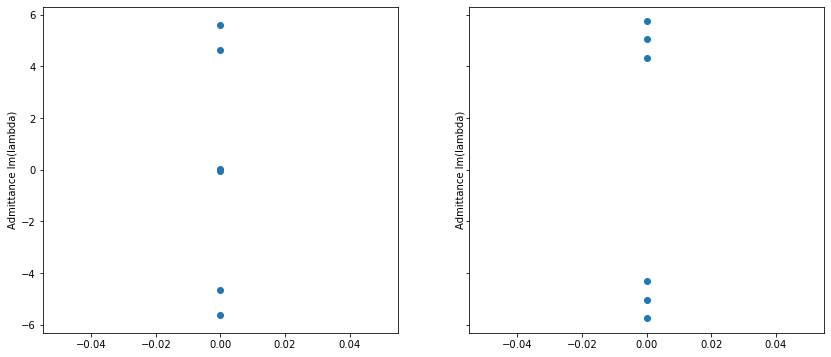

In [137]:
f, ax = plt.subplots(1, 2, sharey=True,figsize=(14,6))

ax[0].scatter(0*Energy,Energy*5)
ax[0].set_ylabel('Admittance Im(lambda)')

ax[1].scatter(0*Energy2,Energy2)
ax[1].set_ylabel('Admittance Im(lambda)')

print(t,t2)

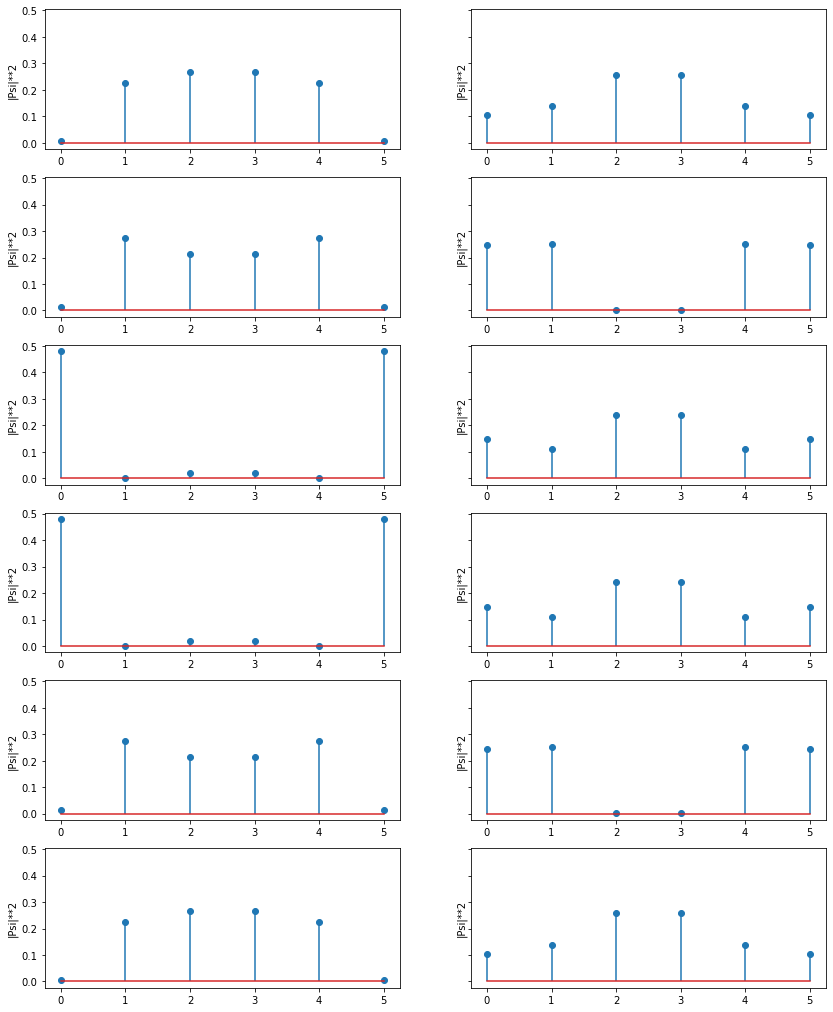

In [138]:
f, ax = plt.subplots(int(NumSites+3),2, sharey=True,figsize=(14,18))

for indL in arange(int(NumSites+3)):
    ax[indL,0].stem(arange(2*NumSites),abs(Psi[:,indL])**2)
    ax[indL,0].set_ylabel('|Psi|**2');

    ax[indL,1].stem(arange(2*NumSites),abs(Psi2[:,indL])**2)
    ax[indL,1].set_ylabel('|Psi|**2');

As an input, we connect a current sourse at two edges of the circuit, therefore it has the following form:

In [142]:
I0 = 1. # in units of amperes
I  = I0*np.concatenate(([1.],np.zeros((2*NumSites-2),dtype='double'),[-1.]),axis=0)
print(I)

[ 1.  0.  0.  0.  0. -1.]


One can then calculate the projection of the current vector on to the eigenkets of H-matrix, $I_n = \langle \phi_n \mid I \rangle$

In [145]:
I_n = np.dot(Psi,I)
I_n2 = np.dot(Psi2,I)
print(I_0)
print(sqrt(sum(I_0**2))/sqrt(2))

[-2.35922393e-16 -9.51260330e-01 -2.22044605e-16 -1.03262326e+00
 -1.66533454e-16 -1.69684969e-01]
1.0


The unknown components of the voltage vector in our basis choice above are $V_n = I_n/\lambda_n$,

In [146]:
V_n  = I_n/Energy
V_n2 = I_n2/Energy2

print(V_n)
print(Psi[:,3]**2)

[ 2.10418129e-16  1.02408404e+00  2.89068013e-14 -1.34431707e+02
 -1.79282417e-16 -1.51341266e-01]
[0.48014266 0.00070826 0.01914909 0.01914909 0.00070826 0.48014266]


One can then calculate the voltage vector in the position basis as follows, $\mid V \rangle = \sum_{n=1}^{2 N} V_n \mid \phi_n \rangle$

In [147]:
V_vector = np.zeros((2*NumSites,),dtype = 'double')
V_vector2 = np.zeros((2*NumSites,),dtype = 'double')

for i in arange(6): 
    V_vector  = V_vector  + V_n[i] * Psi[:,i] 
    V_vector2 = V_vector2 + V_n2[i]*Psi2[:,i] 

<StemContainer object of 3 artists>

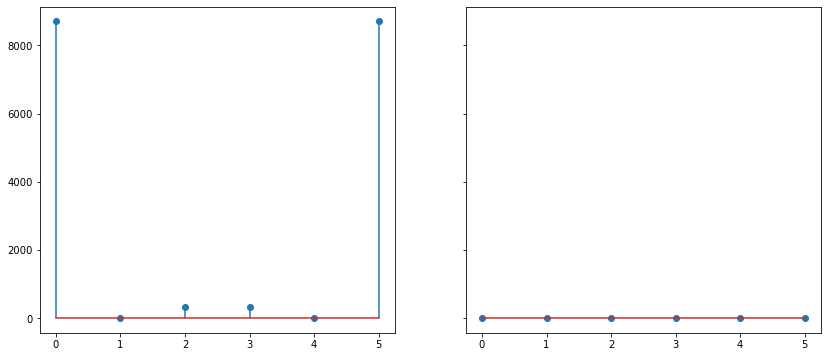

In [125]:
f, ax = plt.subplots(1,2, sharey=True,figsize=(14,6))
ax[0].stem(arange(2*NumSites),abs(V_vector**2))
ax[1].stem(arange(2*NumSites),abs(V_vector2**2))

Let us use an interactive plot for a continuous evolution of the wave function as a selective function of $t = C_1/C_2$

In [206]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def SSH(t):
    NumSites = 12
    H1 = E0*diag(ones(NumSites*2,),0) -t*(diag(mod(arange(0,2*NumSites-1)+1,2),1)+diag(mod(arange(0,2*NumSites-1)+1,2),-1))\
    -(diag(mod(arange(0,2*NumSites-1),2),1)+diag(mod(arange(0,2*NumSites-1),2),-1))
    [En,Psin] = eig(H1)
    Eorder   = argsort(En.real)
    E1 = En[Eorder]
    Psi = Psin[:,Eorder]
    Energy = E1
    
    # plot the mid point energy and the voltage distribution
    f, ax = plt.subplots(1,2, sharey=True,figsize=(14,6))
    ax[0].scatter(0*Energy,Energy/max(Energy))
    ax[0].set_ylabel('Admittance Im(lambda)/ max(lambda)')
    ax[0].set_ylim([-1,1])
    ax[1].stem(arange(2*NumSites),abs(Psi[:,NumSites])**2)
    trend = (t**(arange(2*NumSites))*mod(arange(2*NumSites)+1,2)+\
             t**((2*NumSites-arange(2*NumSites)-1))*mod(arange(2*NumSites),2))
    ax[1].plot(arange(2*NumSites),trend/max(trend)*max(abs(Psi[:,NumSites])**2))
    ax[1].set_ylabel('|Psi|**2')
    ax[1].set_ylim([-1,1])

interact(SSH,t = widgets.FloatSlider(value=0.5,min=0.02,max=1.3,step=0.02))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.3, min=0.02, step=0.02), Output()), _dom_c…

<function __main__.SSH(t)>

#### Impedance calculations

In [148]:
G1 = np.linalg.inv(H1)
G2 = np.linalg.inv(H2)

We can now calculate the impedance between two ends of the SSH circuit using

$$Z_{ij} = \sum_{p} \big[ G(i,p)- G(j,p) \big](\delta_{pi}-\delta_{pj}) = G(i,i) -G(i,j)-G(j,i)+G(j,j). $$

In [149]:
Z1_1N = G1[0,0] + G1[-1,-1] - G1[0,-1]- G1[-1,0]
Z2_1N = G2[0,0] + G2[-1,-1] - G2[0,-1]- G2[-1,0]

In [150]:
abs(Z1_1N),abs(Z2_1N)

(249.99999999999997, 0.016)

We can also calculate the impedance theoretically by inverting $J_{SSH}$.

We need $G$ matrix, $G= J^{-1}$. $J$ can indeed be inverted directly,

<center><img src="week4_Fig3.jpg" width="520"></center>

This calculation is now carried out here.